<a href="https://colab.research.google.com/github/AngeLr721/ret_neuronal_con_keras/blob/master/red_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score
from tensorflow.keras.regularizers import L1, L2, L1L2

In [2]:
eta = 0.01
epochs = 30
batch_size = 10

In [3]:
dataset=mnist.load_data()

In [4]:
dat=np.array(dataset)
print(dat[1,1].shape)
(x_train, y_train), (x_test, y_test) = dataset

(10000,)


<ipython-input-4-d86b9ee74159>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dat=np.array(dataset)


In [5]:
x_trainv = x_train.reshape(60000, 784)
x_testv = x_test.reshape(10000, 784)
x_trainv = x_trainv.astype('float32')
x_testv = x_testv.astype('float32')

x_trainv/=225
x_testv/=225

In [6]:
num_classes=10
y_trainc = keras.utils.to_categorical(y_train, num_classes)
y_testc = keras.utils.to_categorical(y_test, num_classes)

In [7]:
from keras.api._v2.keras import optimizers
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(28*28,), kernel_regularizer=L1(0.001)))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=eta),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42310 (165.27 KB)
Trainable params: 42310 (165.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = model.fit(x_trainv, y_trainc,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_testv, y_testc)
                    )

Epoch 1/30
6000/6000 [==============================] - 24s 4ms/step - loss: 0.8614 - accuracy: 0.4132 - val_loss: 0.2408 - val_accuracy: 0.5124
Epoch 2/30
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1210 - accuracy: 0.4364 - val_loss: 0.0955 - val_accuracy: 0.4070
Epoch 3/30
6000/6000 [==============================] - 19s 3ms/step - loss: 0.0930 - accuracy: 0.3967 - val_loss: 0.0909 - val_accuracy: 0.3907
Epoch 4/30
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0896 - accuracy: 0.3837 - val_loss: 0.0877 - val_accuracy: 0.3978
Epoch 5/30
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0860 - accuracy: 0.4032 - val_loss: 0.0836 - val_accuracy: 0.4253
Epoch 6/30
6000/6000 [==============================] - 17s 3ms/step - loss: 0.0820 - accuracy: 0.4415 - val_loss: 0.0798 - val_accuracy: 0.4668
Epoch 7/30
6000/6000 [==============================] - 16s 3ms/step - loss: 0.0787 - accuracy: 0.4780 - val_loss: 0.0766 - val_ac

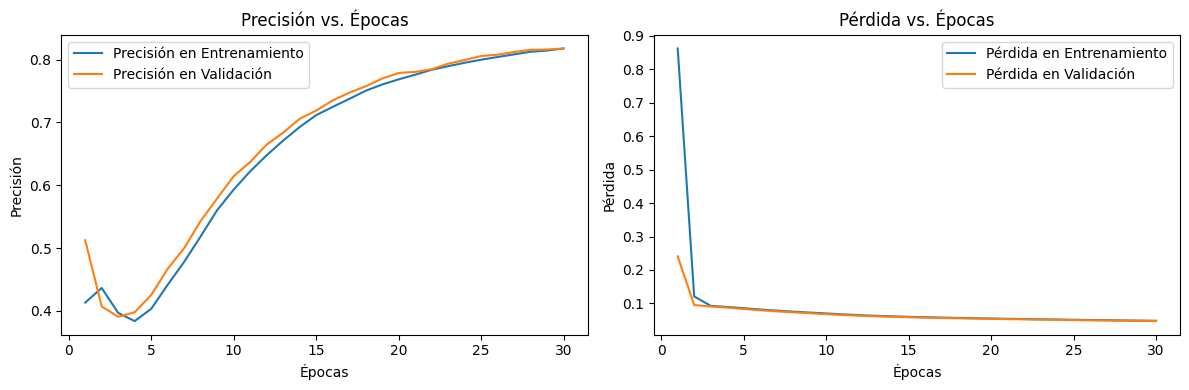

In [11]:
# Obtener la precisión y la pérdida del historial de entrenamiento
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Crear las gráficas
plt.figure(figsize=(12, 4))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Precisión en Entrenamiento')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Precisión en Validación')
plt.title('Precisión vs. Épocas')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Pérdida en Entrenamiento')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Pérdida en Validación')
plt.title('Pérdida vs. Épocas')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar las gráficas
plt.tight_layout()
plt.show()

In [10]:
# Obtiene las métricas de entrenamiento y prueba
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Crea un DataFrame con las métricas
df = pd.DataFrame({
    'train_loss': train_loss,
    'train_accuracy': train_accuracy,
    'val_loss': val_loss,
    'val_accuracy': val_accuracy
})

# Guarda el DataFrame en un archivo CSV
csv_filename = '/content/metricas_entrenamiento_prueba.csv'
df.to_csv(csv_filename, index=False)